
# Web crawling with Selenium

This notebook shows how use selenium to collect data from the web to create a corpus of web page.
The scope is only to understand the capabilities of web crawling and prepare a dataset for academic purporse.

Let’s begin writing our scraper!

We will first install important modules and packages for our Notebook


*   Selenium
*   Chromium-chromedriver



In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

And now we will import some modules on our Notebook


1.   sys: to setup the path of chrome driver
2.   selenium: to emulate the user behaviour
3.   pandas: to work with data
4.   tqdm: to show a progress bar in our notebook
5.   json: to work with json format





In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

First we need to set the options for the ghost browser.
The most important is `--headless` because we are in a "cloud" notebook. In our local notebook we can remove the `--headless` option.  


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("window-size=1900,800")
chrome_options.add_argument("--enable-javascript")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36")

`webdriver` is the most importa object in Selenium.
With `webdriver` we can start the phantom browser, emulate the user navigation and scrape our data. 

Let’s now create a new instance of google chrome.


We will navitage to page by a `get` request. With http we can do a get or a post (or others but they are not important for us): https://www.w3schools.com/tags/ref_httpmethods.asp 



```
wd.get("https://www.reddit.com/r/news/")
```



In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.reddit.com/r/news/")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Take a look to the screenshot from our phantom browser.

Note:
- la language and the locale: It is en_US!
- the screen ratio: is it the same of our notebook?

Populating the interactive namespace from numpy and matplotlib


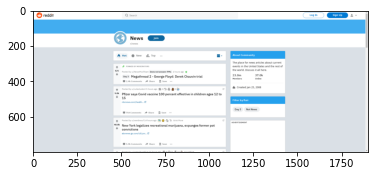

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

Let's try to extract some information from the page



`title` contains the title of our page.




In [ ]:
print(wd.title)

News


### How do we extract the values inside a page with CSS Selector?

Selenium has a method called `find_elements_by_css_selector`.

We will pass our CSS Selector into this method and get a list of selenium elements. Once we have the element, we can extract the text inside it using the `text` function.

In [ ]:
list_a = wd.find_elements_by_css_selector("a")
print(len(list_a))

223


In [ ]:
print(list_a[20].text)

Pfizer says Covid vaccine 100 percent effective in children ages 12 to 15


# Extract the and go to the next page

Let's begin to download the text of the current page and go to the next pages.



In [ ]:
list_a = wd.find_elements_by_css_selector("a")
print(len(list_a))

223


In [ ]:
import pprint
import time

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.reddit.com/r/news/")

items = []
url_completed = []

list_a = wd.find_elements_by_css_selector("a")
items.append({
    "text": wd.find_element_by_css_selector("body").text,
    "title": wd.title,
    "url": wd.current_url
})
url_completed.append(wd.current_url)

for item in list_a:
  try:
    if (item.get_attribute("href") not in url_completed):
      wd.get(item.get_attribute("href"))
      time.sleep(1)
      items.append({
          "text": wd.find_element_by_css_selector("body").text,
          "title": wd.title,
          "url": wd.current_url
      })
      url_completed.append(wd.current_url)
      list_new_a = wd.find_elements_by_css_selector("a")
      list_a.extend(list_new_a)
      len_list = len(list_a)
      print(f"Len of urls {len_list}")
  except:
    pass
  if (len(items) > 1000):
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


Len of urls 954
Len of urls 1061
Len of urls 1067
Len of urls 1158
Len of urls 1217
Len of urls 1276
Len of urls 1596
Len of urls 1916
Len of urls 2035
Len of urls 2154
Len of urls 2256
Len of urls 2358
Len of urls 2422
Len of urls 2486
Len of urls 2562
Len of urls 2638
Len of urls 2727
Len of urls 2816
Len of urls 2875
Len of urls 2934
Len of urls 4008
Len of urls 5082
Len of urls 6156
Len of urls 6365
Len of urls 6574
Len of urls 6783
Len of urls 6992
Len of urls 7201
Len of urls 7410
Len of urls 7619
Len of urls 7828
Len of urls 8037
Len of urls 8246
Len of urls 8455
Len of urls 8664
Len of urls 8873
Len of urls 9082
Len of urls 9291
Len of urls 9500
Len of urls 9709
Len of urls 9918
Len of urls 10126
Len of urls 10334
Len of urls 10542
Len of urls 10741
Len of urls 10940
Len of urls 11139
Len of urls 11342
Len of urls 11545
Len of urls 11748
Len of urls 11889
Len of urls 12030
Len of urls 12081
Len of urls 12132
Len of urls 12183
Len of urls 12234
Len of urls 12284
Len of urls 1233

In [ ]:
len(items)

1001

In [ ]:
pprint.pprint(items[0:5])

[{'text': 'Press J to jump to the feed. Press question mark to learn the rest '
          'of the keyboard shortcuts\n'
          'Log In\n'
          'Sign Up\n'
          'User account menu\n'
          'News\n'
          'r/news\n'
          'Join\n'
          'Hot\n'
          'New\n'
          'Top\n'
          '160\n'
          'PINNED BY MODERATORS\n'
          'Posted byu/NewsModTeam\n'
          'Does not answer PMs\n'
          '3 hours ago\n'
          'Day 3\n'
          'Megathread 2 - George Floyd: Derek Chauvin trial\n'
          '3.1k Comments\n'
          'Share\n'
          'Save\n'
          '16.0k\n'
          'Posted byu/cutestudent\n'
          '6 hours ago\n'
          '3\n'
          '8\n'
          '4\n'
          '5\n'
          '2\n'
          'Pfizer says Covid vaccine 100 percent effective in children ages 12 '
          'to 15\n'
          'nbcnews.com/health...\n'
          '1.1k Comments\n'
          'Share\n'
          'Save\n'
          'Vote\n'
      

# Pandas and data processing

**Well!**
We're starting to see another amazing library for working with data!

It's **pandas**: *Python library for data analysis*.

Basically, with pandas we can manipulate a data set or a historical series in Python.

For now, we start to give a couple of concepts.

Pandas is based on two types of data: **Series** and **DataFrame**:
- `Series` represents a list of data
- `DataFrame` represent a data set in tabular format

Each column of a `DataFrame` is a `Series`.

We can create a `DataFrame` using the `pd.DataFrame` method by passing our dictionary as an input parameter.

A `DataFrame` pandas can be easily exported in *CSV*, *Excel*, ...

For more information about `Pandas` see

https://pandas.pydata.org/getting_started.html


In [ ]:
import pandas as pd
ds_items = pd.DataFrame(items)
ds_items.set_index("url")
ds_items.head()

,text,title,url
0,Press J to jump to the feed. Press question ma...,News,https://www.reddit.com/r/news/
1,Press J to jump to the feed. Press question ma...,reddit: the front page of the internet,https://www.reddit.com/
2,Press J to jump to the feed. Press question ma...,reddit.com: search results - Astrazeneca,https://www.reddit.com/search/?q=Astrazeneca%2...
3,"Login\nBy continuing, you agree to our User Ag...",reddit.com: Log in,https://www.reddit.com/login/?dest=https%3A%2F...
4,ABOUT\nCAREERS\nPRESS\nADVERTISING^\nPARTNERSH...,"User Agreement - October 15, 2020 - Reddit",https://www.redditinc.com/policies/user-agreement


In [ ]:
ds_items.to_csv('ds_items.csv')